**1 - CRISP - DM: Entendimento do negócio**
Nesta primeira etapa do CRISP-DM, entenderemos do que se trata o negócio e quais os objetivos.

Esta é um problema de concessão de cartões de crédito.

Base de dados de proponentes de cartões de crédito, o objetivo é construir um modelo preditivo para identificar o risco de inadimplência(definida pela ocorrência de um atraso maior ou igual a 90 dias em um horizonte de 12 meses) por meio de variáveis que podem ser observadas na data da avaliação do crédito(que é quando o cliente solicita o cartão)

Atividades do CRISP-DM:
* Objetivo de negócio: nosso objetivo é que o modelo sirva o mutuário (o cliente) para avaliar suas próprias decisões, e não a instituição de crédito.
* Objetivos da modelagem: O objetivo está bem definido, desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referente a créditos

Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e os dados.

**2 - CRISP-DM: Entendimento dos dados**

A segunda etapa é o entendimento dos dados, foram fornecidas 15 variáveis mais a variável resposta grifada em negrito na tabela. O significado de cada variável se encontra na tabela.

**Dicionario de dados**
Os dados está disposto em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características dos clientes. Colocamos uma cópia do dicionário de dados na explicação abaixo.

    | Variable Name            | Description                                         | Tipo  |
    | ------------------------ |:---------------------------------------------------:| -----:|
    | sexo| M = 'Masculino'; F = 'Feminino' |M/F|
    | posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
    | posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
    | qtd_filhos| Quantidade de filhos |inteiro|
    | tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
    | educacao| Nível de educação (ex: secundário, superior etc) |texto|
    | estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
    | tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
    | idade | idade em anos |inteiro|
    | tempo de emprego | tempo de emprego em anos |inteiro|
    | possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
    | possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
    | possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
    | possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
    | qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
    | **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

**Pacotes carregados**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

**Carregando dados**

In [3]:
df = pd.read_csv('/kaggle/input/demo-crisp/demo01.csv', na_values='na')
print("Numero e linhas e colunas da tabela :{}".format(df.shape))
df.head()

Numero e linhas e colunas da tabela :(16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


**Entendimento dos dados - Univariada**

Avaliamos a distribuição de todas as variáveis, iremos ver a variável resposta e dois exemplos de univariada.

False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


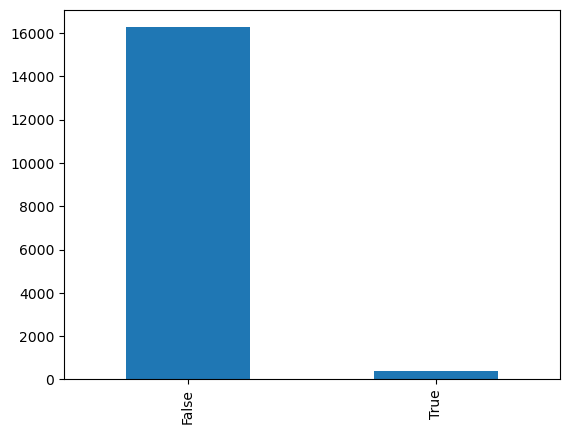

In [38]:
grafico_barras = df['mau'].value_counts().plot.bar()
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

**Usando a variável 'tipo_renda'**

<Figure size 640x480 with 0 Axes>

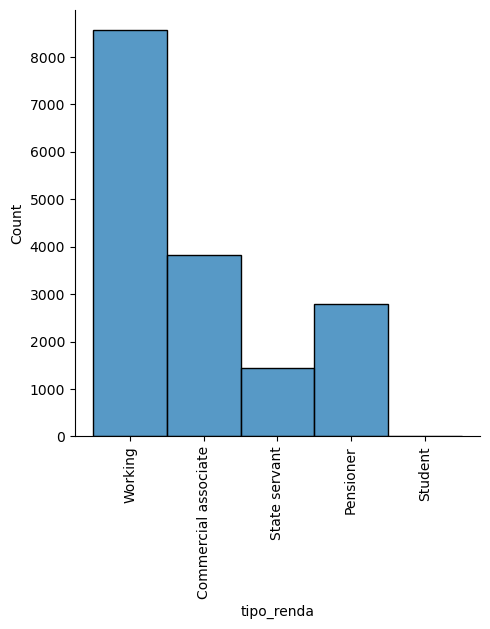

In [39]:

plt.clf()
var = "tipo_renda"
sns.displot(df, x = var, bins = 50)
plt.xticks(rotation=90)
plt.show()

**Usando a variável 'educacao'**

<Figure size 640x480 with 0 Axes>

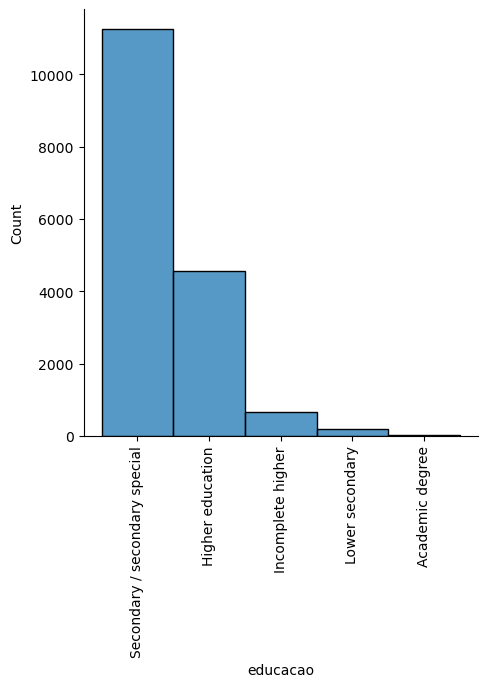

In [40]:
plt.clf()
var = "educacao"
sns.displot(df, x= var, bins=50)
plt.xticks(rotation=90)
plt.show()

**Usando a variável 'tempo_emprego'**

<Figure size 640x480 with 0 Axes>

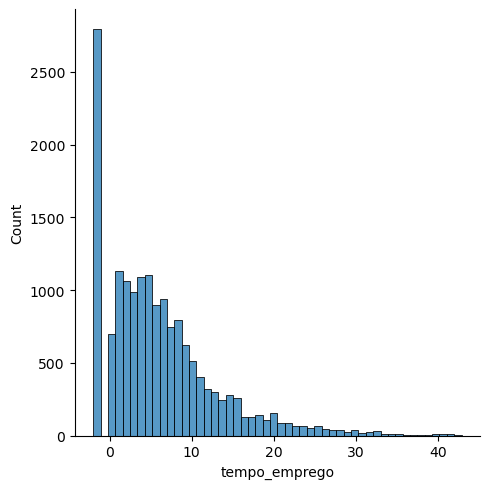

In [41]:
plt.clf()
var = 'tempo_emprego'
df.loc[df[var]<0,var] = -2

sns.displot(df, x = var, bins = 50)
plt.show()

**Histograma da variável 'idade'**

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

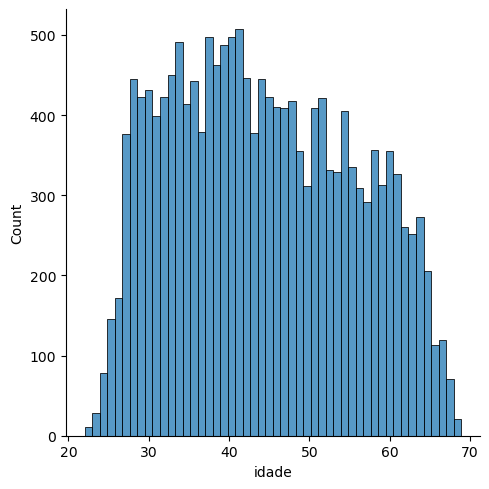

In [42]:
plt.clf()
var = 'idade'
df.loc[df[var]<0, var] = -2
sns.displot(df, x = var, bins = 50)
plt.show

**Entendimento dos dados - Bivariadas**

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.

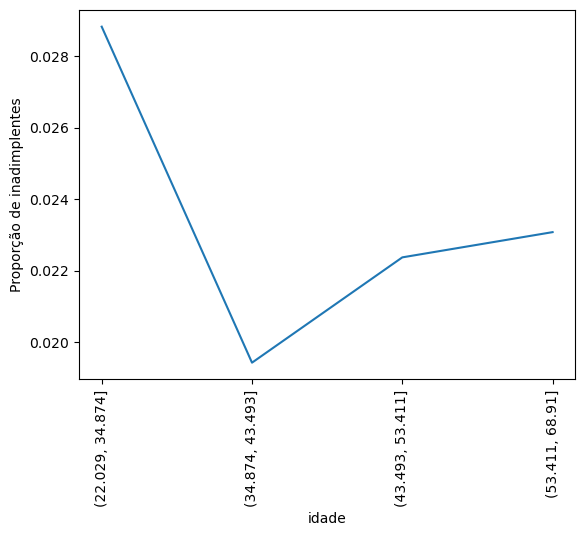

In [43]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4,retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

**3 - CRISP-DM: Preparação dos dados**

Etapa de operações de dados.
* seleção com os dados pré-selecionados
* limpeza de dados, e tratamento de dados faltantes
* construção
* integração - nesse caso, como a base é única, não precisaremos agregar outras fontes
* formatação dos dados


In [52]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])
metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var, 'n_categorias'] = len(df.groupby([var]).size())

metadata

,tipo,n_categorias
qtd_filhos,int64,8
idade,float64,5298
tempo_emprego,float64,3005
possui_celular,int64,1
possui_fone_comercial,int64,2
possui_fone,int64,2
possui_email,int64,2
qt_pessoas_residencia,float64,9
mau,bool,2
sexo_M,uint8,2


In [53]:
#Criando variáveis com uma função indicadora
def convert_dummy(df, feature, rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1, inplace=True)
    df.drop([feature], axis=1, inplace=True)
    df=df.join(pos)
    return df


In [54]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [55]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,1,0,0,0,0,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0


**4 - CRISP-DM: Modelagem**


Realizaremos a construção de modelo

* Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Técnica com uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não.
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)
#### Dividindo a base em treino e teste

In [71]:
# tirando a v. resposta da base de treinamento

x = df.drop("mau", axis = 1)
y = df["mau"]

# tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [57]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
9302,0,46.797260,8.019178,1,0,1,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
14611,0,65.326027,5.882192,1,0,1,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8533,0,45.865753,1.802740,1,0,0,0,2.0,1,0,...,0,1,0,0,0,0,0,0,0,0
2405,0,65.024658,16.621918,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2062,0,38.550685,10.427397,1,1,0,0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6962,0,59.353425,-1000.665753,1,0,1,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
10108,0,42.106849,15.391781,1,0,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2923,0,27.093151,6.271233,1,0,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
16165,1,37.504110,3.210959,1,0,0,0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Rodando o modelo**

A Função RandomForestClassifier gera a estrutura da floresta aleatória, e o ```parametro n_estimator``` define o número da árvore na floresta. A acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Poderemos alterar os parâmetro e verificar se a acurácia do modelo melhora, não se recomenda valores muito altos, altere aos poucos e vá percebendo como o tempo aumenta com os seus recursos, recomendo não ir muito além de 100 arvores.

In [72]:
# Treinar um Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=3)

In [73]:
#Calculando a acurácia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.38%


In [77]:
#Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print('Classificando tx de inadimplencia\n')
print(f'Classificado como bons: {tab[1][0]/(tab[1][0] + tab[0][0])}')
print(f'Classificado como Maus: {tab[1][1]/(tab[1][1] + tab[0][1])}')
tab

Classificando tx de inadimplencia

Classificado como bons: 0.019230769230769232
Classificado como Maus: 0.45454545454545453


mau,False,True
row_0,,
False,4029,79
True,30,25


**5 - CRISP-DM: Avaliação dos resultados**

Etapa final do CRISP, neste caso a nossa avaliação termina com a acurácia.

Mas em problemas futuros aprofundaremos mais - a ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4029 x 5          | 79 x (-100)    | 12.245 |
| Reprovar  |  30 x 5           | 25 x (-100)    | -2.350 |

Estariamos evitando, portanto, um prejuízo de -2.145 '*dinheiros*' - o que na prática significa um aumento no lucro.

**6 - CRISP-DM: Implantação**
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.